In [1]:
import pandas as pd
import missingno as mso
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [3]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [8]:
df['Order Date']

0       11-08-2017
1       11-08-2017
2       06-12-2017
3       10-11-2016
4       10-11-2016
           ...    
9989    12/24/2015
9990    07-12-2015
9991    06-06-2017
9992    10/16/2018
9993     4/17/2018
Name: Order Date, Length: 9994, dtype: object

In [10]:
df['Order Date']=pd.to_datetime(df['Order Date'],format="mixed")

In [12]:
df.dtypes

Order ID                 object
Customer Name            object
Category                 object
Sub Category             object
City                     object
Order Date       datetime64[ns]
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
dtype: object

In [13]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

<Axes: >

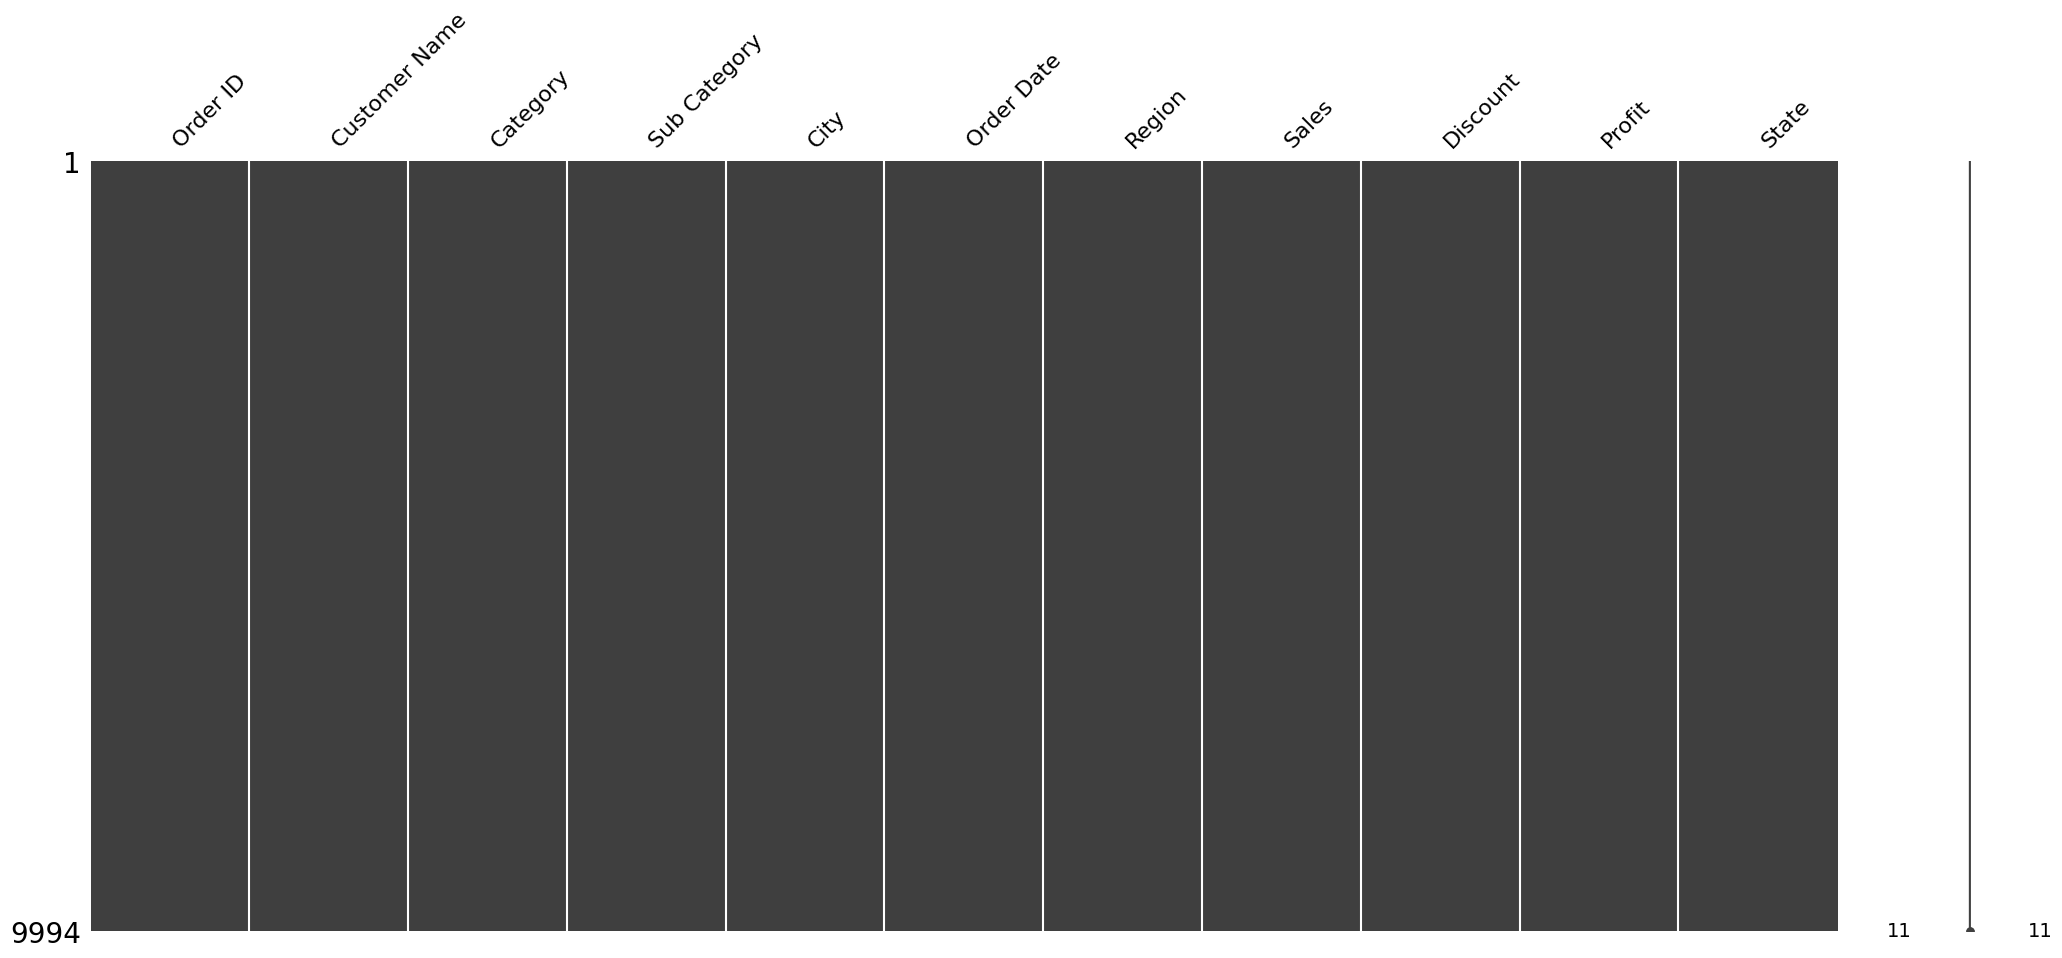

In [14]:
mso.matrix(df)

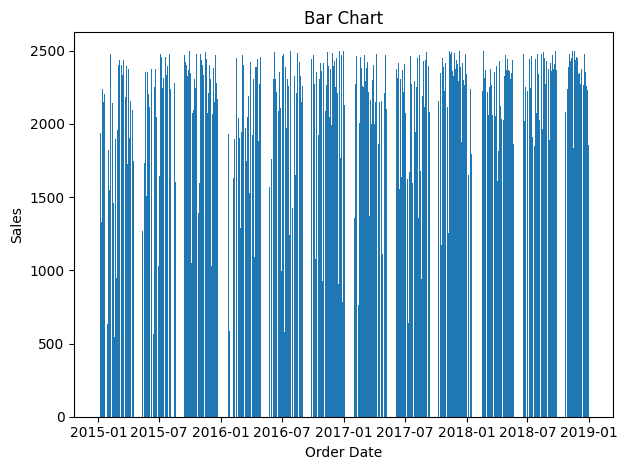

In [20]:
plt.title("Bar Chart")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.bar(df['Order Date'],df['Sales'])
plt.tight_layout()
plt.show()

In [21]:
df['Category'].value_counts()

Category
Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: count, dtype: int64

In [26]:
category_avg = df.groupby('Category')['Sales'].mean()
print(category_avg)

Category
Bakery               1494.891012
Beverages            1489.509286
Eggs, Meat & Fish    1521.745638
Food Grains          1513.070100
Fruits & Veggies     1481.471791
Oil & Masala         1497.753123
Snacks               1477.903567
Name: Sales, dtype: float64


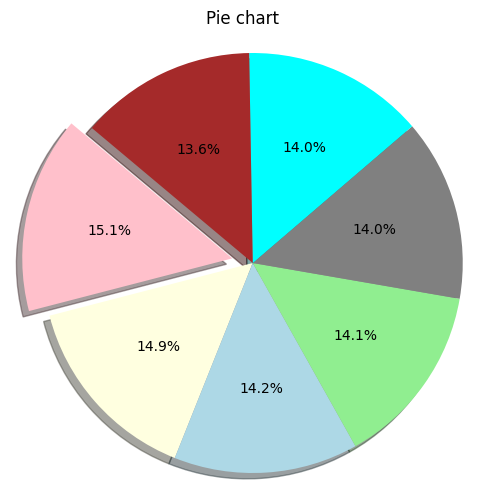

In [24]:
plt.figure(figsize=(6,6))
explode=(0.1,0,0,0,0,0,0)
plt.pie(df["Category"].value_counts(),colors=["pink","lightyellow","Lightblue","lightgreen","gray","cyan","brown"], explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie chart")
plt.axis('equal')
plt.show()

In [15]:
num_cols=df.select_dtypes(include='number')
num_cols

,Sales,Discount,Profit
0,1254,0.12,401.28
1,749,0.18,149.80
2,2360,0.21,165.20
3,896,0.25,89.60
4,2355,0.26,918.45
...,...,...,...
9989,945,0.16,359.10
9990,1195,0.26,71.70
9991,1567,0.16,501.44
9992,1659,0.15,597.24


In [16]:
num_cols.corr()

,Sales,Discount,Profit
Sales,1.000000,-0.005512,0.605349
Discount,-0.005512,1.000000,0.000017
Profit,0.605349,0.000017,1.000000


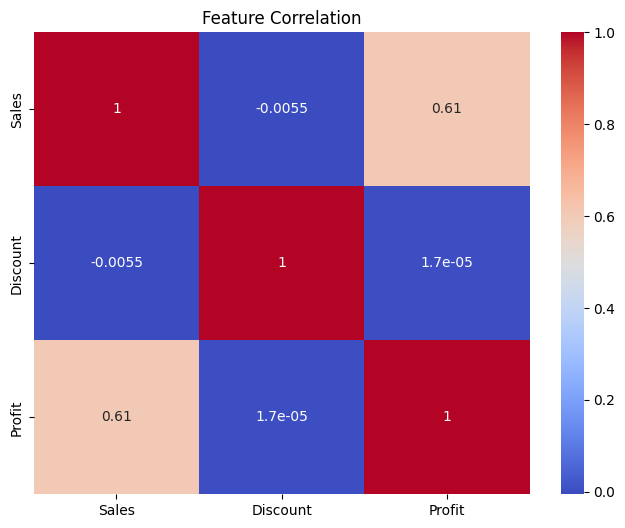

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(num_cols.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation")
plt.show()